In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

%matplotlib inline

In [22]:
files = [file 
         for file 
         in listdir('.')
         if '2006' in file
         if 'AllUnits' not in file
        ]
print(files)

['MexPresElec2006_E01.txt', 'MexPresElec2006_E02.txt', 'MexPresElec2006_E03.txt', 'MexPresElec2006_E04.txt', 'MexPresElec2006_E05.txt', 'MexPresElec2006_E06.txt', 'MexPresElec2006_E07.txt', 'MexPresElec2006_E08.txt', 'MexPresElec2006_E09.txt', 'MexPresElec2006_E10.txt', 'MexPresElec2006_E11.txt', 'MexPresElec2006_E12.txt', 'MexPresElec2006_E13.txt', 'MexPresElec2006_E14.txt', 'MexPresElec2006_E15.txt', 'MexPresElec2006_E16.txt', 'MexPresElec2006_E17.txt', 'MexPresElec2006_E18.txt', 'MexPresElec2006_E19.txt', 'MexPresElec2006_E20.txt', 'MexPresElec2006_E21.txt', 'MexPresElec2006_E22.txt', 'MexPresElec2006_E23.txt', 'MexPresElec2006_E24.txt', 'MexPresElec2006_E25.txt', 'MexPresElec2006_E26.txt', 'MexPresElec2006_E27.txt', 'MexPresElec2006_E28.txt', 'MexPresElec2006_E29.txt', 'MexPresElec2006_E30.txt', 'MexPresElec2006_E31.txt', 'MexPresElec2006_E32.txt']


In [23]:
df_AllStates2006 = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep=';')
    df_AllStates2006 = df_AllStates2006._append(df)
df_AllStates2006.shape

(127384, 19)

In [24]:
results = df_AllStates2006[['PAN', 'APM', 'PBT', 'NVA_A',
       'ASDC', 'NO_VOTOS_CAN_NREG', 'VALIDOS', 'NO_VOTOS_NULOS', 'TOTAL',
       'LISTA_NOMINAL']].sum()
results.sort_values(ascending=False)

LISTA_NOMINAL        69640708.0
TOTAL                40963225.0
VALIDOS              40081447.0
PAN                  14738551.0
PBT                  14452899.0
APM                   9095196.0
ASDC                  1112536.0
NO_VOTOS_NULOS         881778.0
NVA_A                  391461.0
NO_VOTOS_CAN_NREG      290806.0
dtype: float64

In [25]:
df_AllStates2006['pct_ganador'] = df_AllStates2006['PAN']/df_AllStates2006['TOTAL']
df_AllStates2006['pct_participacion'] = df_AllStates2006['TOTAL']/df_AllStates2006['LISTA_NOMINAL']

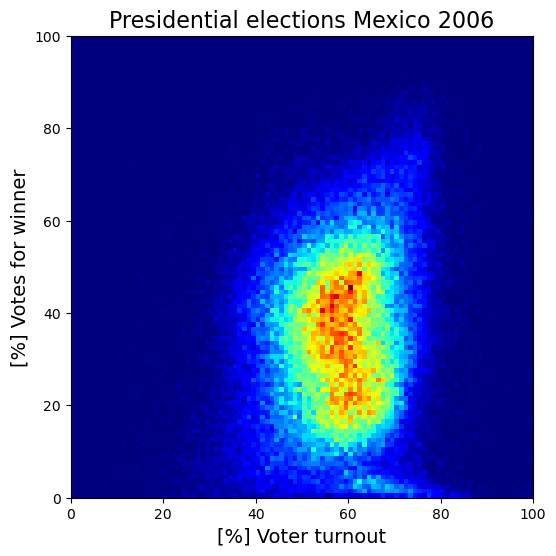

In [26]:
# df_AllStates.fillna(0, inplace=True)
y, x = df_AllStates2006[['pct_ganador', 'pct_participacion']].T.values * 100
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, density=True, range=[[0,100],[0,100]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# heatmap = heatmap * 100

# plt.clf()
fig, ax = plt.subplots(figsize=[6]*2)
# plt.Figure(figsize=[20]*2)
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='jet')
plt.xlabel('[%] Voter turnout',fontsize=14)
plt.ylabel('[%] Votes for winner',fontsize=14)
title = 'Presidential elections Mexico 2006'
plt.title(title,
          fontsize=16,
         )
plt.savefig(f'{title.replace(' ', '_')}.png', 
            dpi=300,
           )
plt.show()

In [84]:
# df_AllStates2006['pct_ganador_cummulative'] = df_AllStates2006['PAN']/df_AllStates2006['TOTAL']
df_AllStates2006.sort_values(by='pct_participacion',inplace=True)
df_AllStates2006['pct_ganador_cummulative'] = np.cumsum(df_AllStates2006['pct_ganador'].fillna(0))


In [95]:
df_AllStates2006.reset_index(drop=True)['pct_ganador_cummulative']

0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
              ...     
127379    44713.433779
127380    44713.722512
127381    44713.722512
127382    44713.722512
127383    44713.722512
Name: pct_ganador_cummulative, Length: 127384, dtype: float64

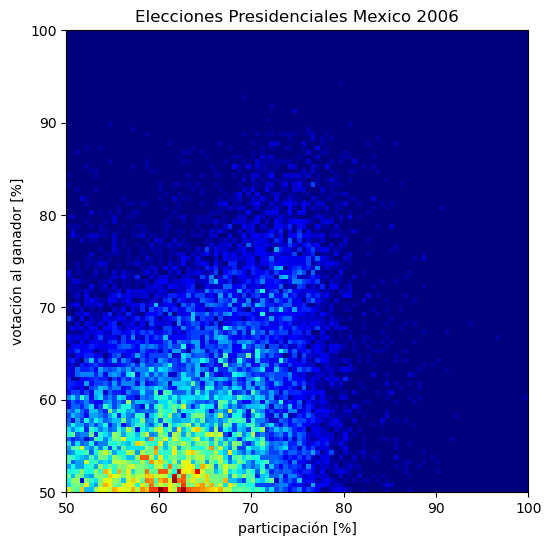

In [27]:
y, x = df_AllStates2006.query('pct_ganador >= 0.50 and pct_participacion >= 0.50')[
    ['pct_ganador', 'pct_participacion']].T.values * 100

# plot(
#     kind='scatter', y='pct_ganador', x='pct_participacion', s=0.1, ylim=(0.66, 1.0), xlim=(0.66, 1.0))

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, density=True, range=[[50,100],[50,100]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# heatmap = heatmap * 100

# plt.clf()
fig, ax = plt.subplots(figsize=[6]*2)
# plt.Figure(figsize=[20]*2)
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='jet')
plt.xlabel('participación [%]')
plt.ylabel('votación al ganador [%]')
plt.title('Elecciones Presidenciales Mexico 2006')
plt.show()

In [28]:
df_AllStates2006.query('pct_ganador >= 0.667 and pct_participacion >= 0.667').T.values

array([[1, 1, 1, ..., 31, 31, 32],
       ['Aguascalientes', 'Aguascalientes', 'Aguascalientes', ...,
        'Yucat n', 'Yucat n', 'Zacatecas'],
       [1, 2, 3, ..., 5, 5, 4],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [0.8636363636363636, 0.684931506849315, 0.6941176470588235, ...,
        0.6683168316831684, 0.679814385150812, 0.6698795180722892],
       [0.8301886792452831, 0.8202247191011236, 0.8374384236453202, ...,
        0.7137809187279152, 0.7268128161888702, 0.7332155477031802]],
      dtype=object)

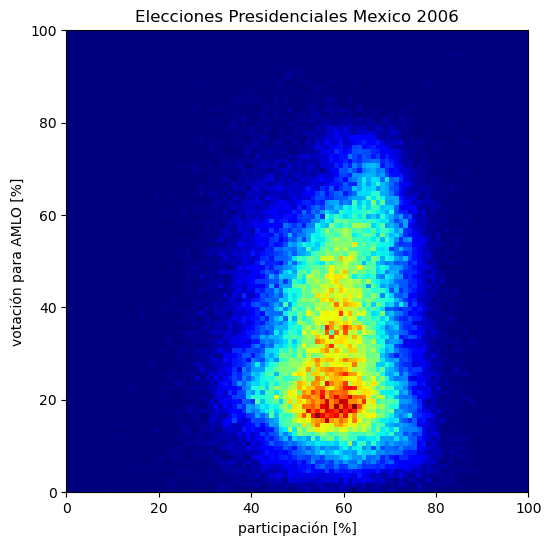

In [29]:
df_AllStates2006['pct_PBT'] = df_AllStates2006['PBT']/df_AllStates2006['TOTAL']
y, x = df_AllStates2006[['pct_PBT', 'pct_participacion']].T.values * 100
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, density=True, range=[[0,100],[0,100]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# heatmap = heatmap * 100

# plt.clf()
fig, ax = plt.subplots(figsize=[6]*2)
# plt.Figure(figsize=[20]*2)
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='jet')
plt.xlabel('participación [%]')
plt.ylabel('votación para AMLO [%]')
plt.title('Elecciones Presidenciales Mexico 2006')
plt.show()

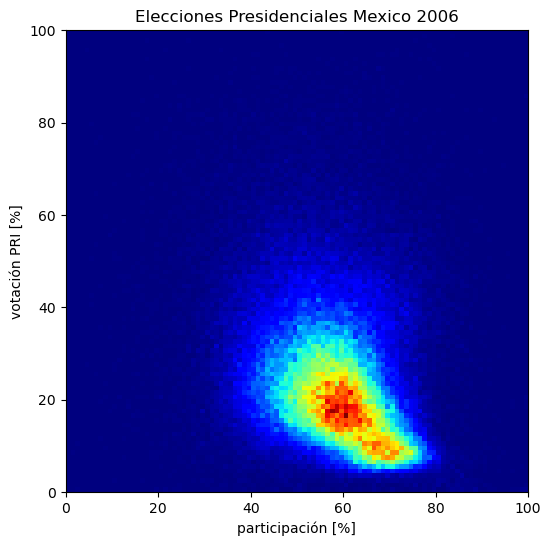

In [30]:
df_AllStates2006['pct_APM'] = df_AllStates2006['APM']/df_AllStates2006['TOTAL']
y, x = df_AllStates2006[['pct_APM', 'pct_participacion']].T.values * 100
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, density=True, range=[[0,100],[0,100]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# heatmap = heatmap * 100

# plt.clf()
fig, ax = plt.subplots(figsize=[6]*2)
# plt.Figure(figsize=[20]*2)
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='jet')
plt.xlabel('participación [%]')
plt.ylabel('votación PRI [%]')
plt.title('Elecciones Presidenciales Mexico 2006')
plt.show()

In [31]:
df_AllStates2006.to_csv('MexPresElection_AllUnits2006.csv')

In [31]:
df_AllStates2012 = pd.read_csv('MexPresElec2012_AllStates.txt', sep='|', skiprows=4)
df_AllStates2012.head()

,ESTADO,DISTRITO,SECCION,ID_CASILLA,TIPO_CASILLA,EXT_CONTIGUA,UBICACION_CASILLA,TIPO_ACTA,NUM_BOLETAS_SOBRANTES,TOTAL_CIUDADANOS_VOTARON,...,NO_REGISTRADOS,NULOS,TOTAL_VOTOS,LISTA_NOMINAL,OBSERVACIONES,CONTABILIZADA,CRYT,HORA_ACOPIO,HORA_CAPTURA,HORA_REGISTRO
0,1,1,338,1,B,0,2,2,231,281,...,0,6,287,505,,1.0,NaN,2012-07-02 01:25:00.0,2012-07-02 04:28:04.0,2012-07-02 04:28:15.608
1,1,1,338,1,C,0,2,2,220,290,...,0,8,299,505,,1.0,NaN,2012-07-02 01:22:00.0,2012-07-02 05:37:30.0,2012-07-02 05:37:34.744
2,1,1,338,2,C,0,2,2,267,247,...,0,10,252,505,,1.0,NaN,2012-07-02 01:22:00.0,2012-07-02 06:04:08.0,2012-07-02 06:04:19.257
3,1,1,339,1,B,0,2,2,307,404,...,0,7,497,700,,1.0,NaN,2012-07-02 01:25:00.0,2012-07-02 04:34:59.0,2012-07-02 04:35:04.336
4,1,1,339,1,C,0,2,2,314,398,...,0,12,399,700,,1.0,NaN,2012-07-02 02:17:00.0,2012-07-02 04:33:59.0,2012-07-02 04:34:03.676


In [32]:
# df_AllStates2012.columns
df_AllStates2012.shape

(144013, 33)

In [33]:
columns =['NUM_BOLETAS_SOBRANTES', 'TOTAL_CIUDADANOS_VOTARON',
          'NUM_BOLETAS_EXTRAIDAS', 'PAN', 'PRI', 'PRD', 'PVEM', 
          'PT', 'MC', 'PANAL', 'C_PRI_PVEM', 'C_PRD_PT_MC', 
          'C_PRD_PT', 'C_PRD_MC', 'C_PT_MC', 'NO_REGISTRADOS', 
          'NULOS', 'TOTAL_VOTOS', 'LISTA_NOMINAL']
df_AllStates2012[columns] = df_AllStates2012[columns].replace(
    to_replace=[' ', 'Ilegible', 'Sin dato'], value=0).astype(int)
results = df_AllStates2012[columns].sum()
results.sort_values(ascending=False)

LISTA_NOMINAL               79492217
TOTAL_VOTOS                 49526631
TOTAL_CIUDADANOS_VOTARON    47662601
NUM_BOLETAS_EXTRAIDAS       46815854
NUM_BOLETAS_SOBRANTES       30536417
PRI                         14323820
PAN                         12560758
PRD                          9645472
C_PRI_PVEM                   3611143
C_PRD_PT_MC                  2940408
NULOS                        1220217
PT                           1218282
PANAL                        1137848
MC                            986260
PVEM                          950877
C_PRD_PT                      610708
C_PRD_MC                      181441
C_PT_MC                        92534
NO_REGISTRADOS                 46863
dtype: int64

In [34]:
df_AllStates2012['pct_ganador'] = df_AllStates2012['PRI']/df_AllStates2012['TOTAL_CIUDADANOS_VOTARON']
df_AllStates2012['pct_participacion'] = df_AllStates2012['TOTAL_CIUDADANOS_VOTARON']/df_AllStates2012['LISTA_NOMINAL']

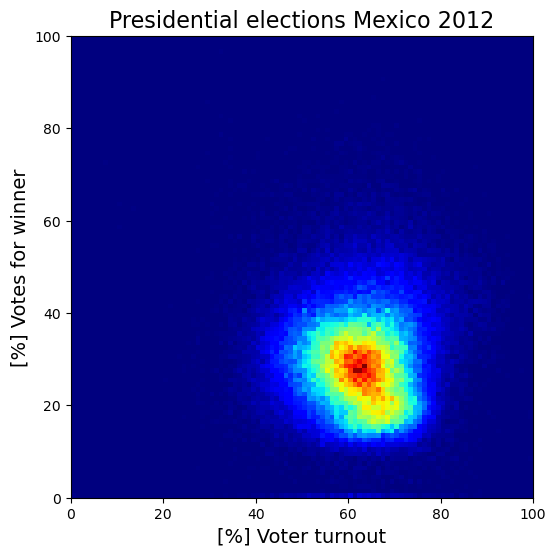

In [35]:
# df_AllStates.fillna(0, inplace=True)
y, x = df_AllStates2012[['pct_ganador', 'pct_participacion']].T.values * 100
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, density=True, range=[[0,100],[0,100]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# heatmap = heatmap * 100

# plt.clf()
fig, ax = plt.subplots(figsize=[6]*2)
ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='jet')
plt.xlabel('[%] Voter turnout',fontsize=14)
plt.ylabel('[%] Votes for winner',fontsize=14)
# plt.title('Presidential elections Mexico 2012',fontsize=16)
# plt.show()
title = 'Presidential elections Mexico 2012'
plt.title(title,
          fontsize=16,
         )
plt.savefig(f'{title.replace(' ', '_')}.png', 
            dpi=300,
           )
plt.show()

In [44]:
df_AllStates2012.to_csv('MexPresElection_AllUnits2012.csv')